# California House Price Model

## Project Description
Your task is to predict the average house values in Californian districts, given a number of features for each district:
- Location (Longitude and Latitude)
- Average Houses' Age
- Total Rooms
- Total Bedrooms
- District Population
- Number of Households
- Average Annual Income
- Average House Value
- Proximity to Ocean Categories:One Hour Away from Ocean (1H Ocean), Inland, Near Ocean, Near Bay, Island    

## 1. Import the Basic Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. Importing the Dataset

In [6]:
data = pd.read_csv('../data/CaliforniaHousing.csv')
data

,Longitude,Latitude,Age,Total_rooms,Total_bedrooms,Population,Households,Income (US $1000K),Value,Ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


In [7]:
# in case, you want to see only a few rows:
data.iloc[24:32]

,Longitude,Latitude,Age,Total_rooms,Total_bedrooms,Population,Households,Income (US $1000K),Value,Ocean_proximity
24,-122.27,37.84,52,2224,437.0,1006,422,2.6000,132600,NEAR BAY
25,-122.28,37.85,41,535,123.0,317,119,2.4038,107500,NEAR BAY
26,-122.28,37.85,49,1130,244.0,607,239,2.4597,93800,NEAR BAY
27,-122.28,37.85,52,1898,421.0,1102,397,1.8080,105500,NEAR BAY
28,-122.28,37.84,50,2082,492.0,1131,473,1.6424,108900,NEAR BAY
29,-122.28,37.84,52,729,160.0,395,155,1.6875,132000,NEAR BAY
30,-122.28,37.84,49,1916,447.0,863,378,1.9274,122300,NEAR BAY
31,-122.28,37.84,52,2153,481.0,1168,441,1.9615,115200,NEAR BAY


## 3. Exploratory Data Analysis (EDA)
Checking the main characteristics of the dataset.

### 3.1. Reviewing the data for some general information

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Longitude           20640 non-null  float64
 1   Latitude            20640 non-null  float64
 2   Age                 20640 non-null  int64  
 3   Total_rooms         20640 non-null  int64  
 4   Total_bedrooms      20433 non-null  float64
 5   Population          20640 non-null  int64  
 6   Households          20640 non-null  int64  
 7   Income (US $1000K)  20640 non-null  float64
 8   Value               20640 non-null  int64  
 9   Ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [9]:
data['Ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: Ocean_proximity, dtype: int64

### 3.2. Reviewing overall statistical information

In [10]:
data.describe()

,Longitude,Latitude,Age,Total_rooms,Total_bedrooms,Population,Households,Income (US $1000K),Value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### 3.3. Gaining some insights by plotting different variables

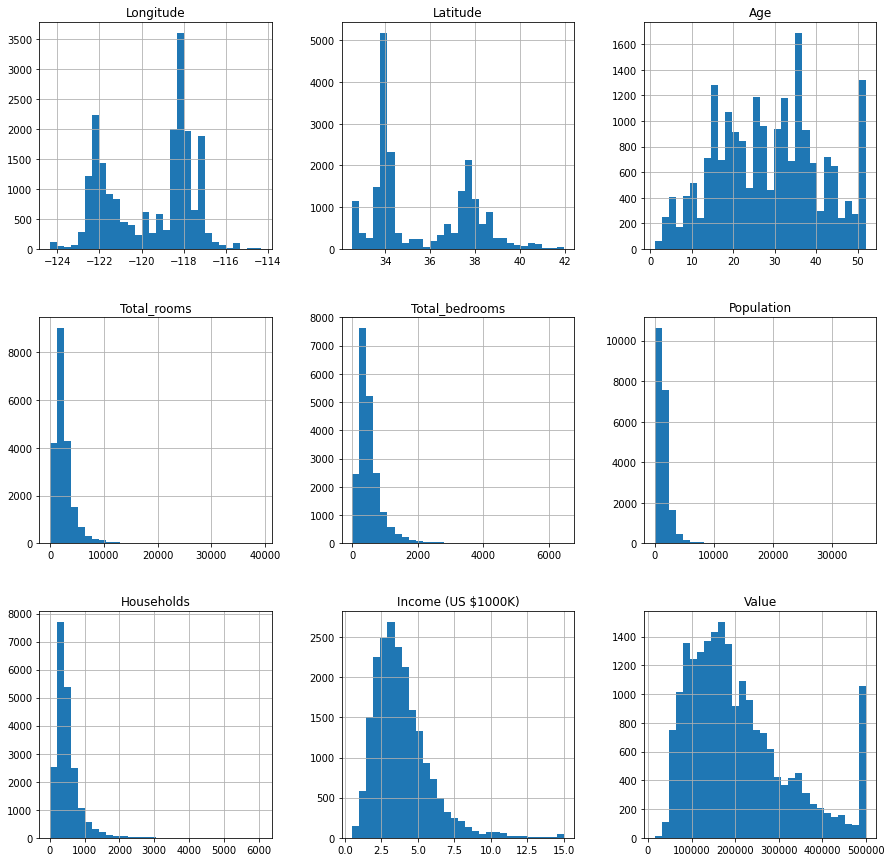

In [11]:
data.hist(bins=30, figsize=(15, 15))
plt.show()

- Normal distribution appears right-skewed for some parameters. One of the typical ways to deal with this issue is log
transform.

### 3.4. Visualizing the data based on the location

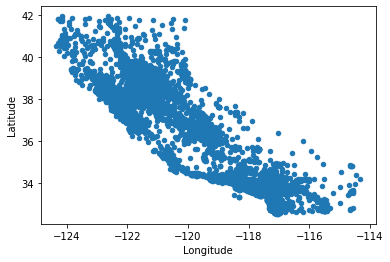

In [12]:
data.plot(kind="scatter", x="Longitude", y="Latitude")
plt.show()

If you pay attention, you notice, the shape of the above graph looks like California! We can also add a new parameter,
alpha (transparency), to show shows the denser area with a more intense color. Let's set alpha=0.1

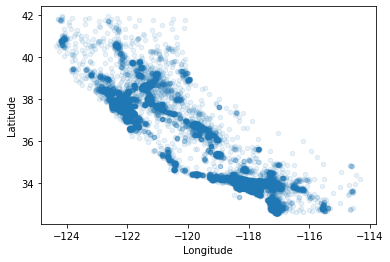

In [13]:
data.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.1)
plt.show()

Now, you can clearly see some high-density areas: e.g., areas near the Bay Area, Los Angeles, and San Diego.
Furthermore, we can visualize to check if housing price is related to location and population density.

### 3.5. Visualizing the data based on the house value and population
We can plot the above graph; but this time we show each district's population by radius of each circle (options), and
the color represents the price (option c). So, the bigger the radius of the dots, means higher population, and a range
of colors for the value.

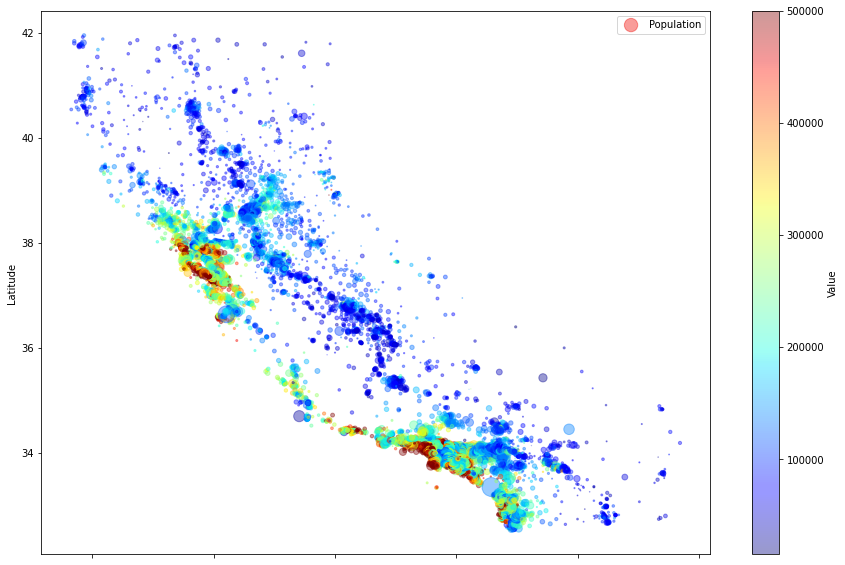

In [14]:
data.plot(kind="scatter", x="Longitude", y="Latitude",
          s=data['Population'] / 100, label="Population",
          c="Value", cmap=plt.get_cmap("jet"),
          colorbar=True, alpha=0.4, figsize=(15, 10),
          )
plt.legend()
plt.show()

We can see that:
1. Housing prices are very related to location and population density.
2. It looks like houses are more expensive near big cities such as SA and LA.

### 3.6. Checking correlations
- Here, we want to see how house value correlates to different parameters. We can compute the standard correlation
coefficient (The Pearson's r) between house value and other parameters.
- The correlation coefficient ranges from -1 to +1. When it is close to i, it means that there is a strong positive
correlation (for example, by increasing the parameter the house value goes up); and when it is close to -1, it means
that there is a strong negative correlation(for example, by increasing the parameter the house value comes down).
- Please note, correlation coefficient 1 means, comparing a parameter with itself. 

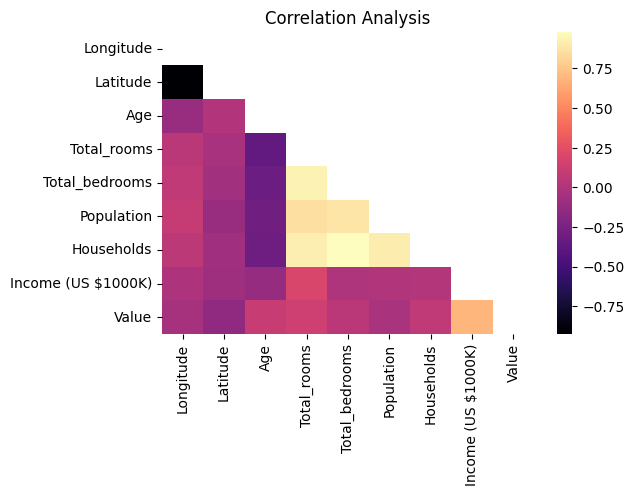

In [15]:
corr_matrix = data.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Only keep the upper triangle of an array.
from seaborn import heatmap

plt.figure(dpi=100)
plt.title('Correlation Analysis')
heatmap(corr_matrix, mask=mask, annot=False, lw=0, linecolor='white', cmap='magma', fmt="0.2f")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [16]:
corr_matrix["Value"].sort_values(ascending=False)

Value                 1.000000
Income (US $1000K)    0.688075
Total_rooms           0.134153
Age                   0.105623
Households            0.065843
Total_bedrooms        0.049686
Population           -0.024650
Longitude            -0.045967
Latitude             -0.144160
Name: Value, dtype: float64

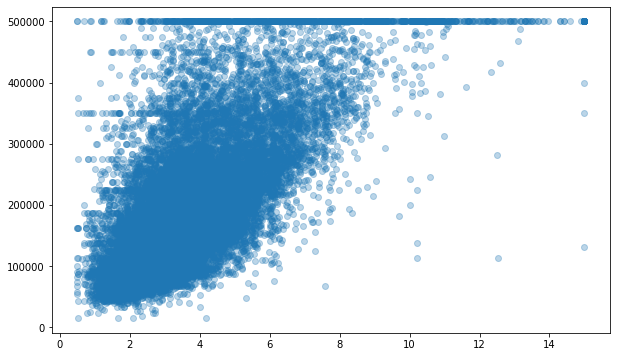

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(y=data['Value'], x=data['Income (US $1000K)'], alpha=0.3)
plt.show()

Data is kind of clamped at 500000.

### 3.7. Creating new features and checking their correlations

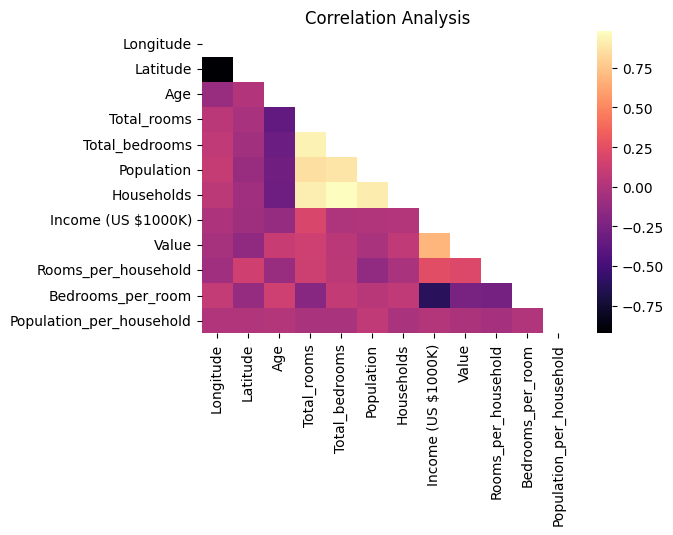

In [18]:
data["Rooms_per_household"] = data["Total_rooms"] / data["Population"]
data["Bedrooms_per_room"] = data["Total_bedrooms"] / data["Total_rooms"]
data["Population_per_household"] = data["Population"] / data["Households"]

corr_matrix = data.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Only keep the upper triangle of an array.
from seaborn import heatmap

plt.figure(dpi=100)
plt.title('Correlation Analysis')
heatmap(corr_matrix, mask=mask, annot=False, lw=0, linecolor='white', cmap='magma', fmt="0.2f")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [19]:
corr_matrix["Value"].sort_values(ascending=False)

Value                       1.000000
Income (US $1000K)          0.688075
Rooms_per_household         0.209482
Total_rooms                 0.134153
Age                         0.105623
Households                  0.065843
Total_bedrooms              0.049686
Population_per_household   -0.023737
Population                 -0.024650
Longitude                  -0.045967
Latitude                   -0.144160
Bedrooms_per_room          -0.255880
Name: Value, dtype: float64

Rooms_per_household and bedrooms_per_room have better correlations with the house value than population_per_household.

## 4. Preprocessing the Data for Machine Learning

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Longitude                 20640 non-null  float64
 1   Latitude                  20640 non-null  float64
 2   Age                       20640 non-null  int64  
 3   Total_rooms               20640 non-null  int64  
 4   Total_bedrooms            20433 non-null  float64
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Income (US $1000K)        20640 non-null  float64
 8   Value                     20640 non-null  int64  
 9   Ocean_proximity           20640 non-null  object 
 10  Rooms_per_household       20640 non-null  float64
 11  Bedrooms_per_room         20433 non-null  float64
 12  Population_per_household  20640 non-null  float64
dtypes: float64(7), int64(5), object(1)
memory usage: 2.0+ MB


### 4.1. Rearranging the sequence of the data
- Put all numerical values in the first 10 columns.
- Put house value at the 2nd last column.
- Put categorical data (ocean proximity) as the last column.

In [21]:
data = data[
    ['Longitude', 'Latitude', 'Age', 'Total_rooms', 'Total_bedrooms', 'Population', 'Households', 'Income (US $1000K)',
     'Rooms_per_household', 'Bedrooms_per_room', 'Population_per_household', 'Value', 'Ocean_proximity']]

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Longitude                 20640 non-null  float64
 1   Latitude                  20640 non-null  float64
 2   Age                       20640 non-null  int64  
 3   Total_rooms               20640 non-null  int64  
 4   Total_bedrooms            20433 non-null  float64
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Income (US $1000K)        20640 non-null  float64
 8   Rooms_per_household       20640 non-null  float64
 9   Bedrooms_per_room         20433 non-null  float64
 10  Population_per_household  20640 non-null  float64
 11  Value                     20640 non-null  int64  
 12  Ocean_proximity           20640 non-null  object 
dtypes: float64(7), int64(5), object(1)
memory usage: 2.0+ MB


We have some missing data.

### 4.2. Scaling the numerical data 

In [23]:
temp = data.iloc[:, :-1].values
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
temp = sc.fit_transform(temp)

### 4.3. Separating the input data from the output data.

In [24]:
X = temp[:, :-1]  # Get rid of the categorical data for now
y = temp[:, -1]

### 4.4. Imputing the missing numerical data

In [25]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X)
X = imputer.transform(X)

### 4.5. Taking care of outliers in the numerical data

In [26]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(contamination=0.01)
y_hat = lof.fit_predict(X)
mask = (y_hat != -1)
X, y = X[mask, :], y[mask]
print(X.shape, y.shape)
pd.DataFrame(X)

(20433, 11) (20433,)


,0,1,2,3,4,5,6,7,8,9,10
0,-1.327835,1.052548,0.982143,-0.804819,-0.970325,-0.974429,-0.977033,2.344766,0.659647,-1.146024,-0.049597
1,-1.322844,1.043185,-0.607019,2.045890,1.348276,0.861439,1.669961,2.332238,0.854906,-0.987254,-0.092512
2,-1.332827,1.038503,1.856182,-0.535746,-0.825561,-0.820777,-0.843637,1.782699,0.855758,-1.440514,-0.025843
3,-1.337818,1.038503,1.856182,-0.624215,-0.718768,-0.766028,-0.733781,0.932968,0.267179,-0.492925,-0.050329
4,-1.337818,1.038503,1.856182,-0.462404,-0.611974,-0.759847,-0.629157,-0.012881,0.787681,-0.706141,-0.085616
...,...,...,...,...,...,...,...,...,...,...,...
20428,-0.758826,1.801647,-0.289187,-0.444985,-0.388895,-0.512592,-0.443449,-1.216128,-0.005720,0.199820,-0.049110
20429,-0.818722,1.806329,-0.845393,-0.888704,-0.920488,-0.944405,-1.008420,-0.691593,-0.016671,0.037412,0.005021
20430,-0.823713,1.778237,-0.924851,-0.174995,-0.125472,-0.369537,-0.174042,-1.142593,0.228066,0.036808,-0.071735
20431,-0.873626,1.778237,-0.845393,-0.355600,-0.305834,-0.604429,-0.393753,-1.054583,0.465232,0.118204,-0.091225


### 4.6. Encoding the categorical data

In [27]:
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder()
encoded_data = one_hot.fit_transform(data['Ocean_proximity'].values.reshape(-1, 1)).toarray()
encoded_data = encoded_data[mask, :]

##### Combining the numerical and categorical training data

In [28]:
X = np.concatenate((X, encoded_data), axis=1)

##### A quick check on the preprocessed training input

In [29]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.327835,1.052548,0.982143,-0.804819,-0.970325,-0.974429,-0.977033,2.344766,0.659647,-1.146024,-0.049597,0.0,0.0,0.0,1.0,0.0
1,-1.322844,1.043185,-0.607019,2.045890,1.348276,0.861439,1.669961,2.332238,0.854906,-0.987254,-0.092512,0.0,0.0,0.0,1.0,0.0
2,-1.332827,1.038503,1.856182,-0.535746,-0.825561,-0.820777,-0.843637,1.782699,0.855758,-1.440514,-0.025843,0.0,0.0,0.0,1.0,0.0
3,-1.337818,1.038503,1.856182,-0.624215,-0.718768,-0.766028,-0.733781,0.932968,0.267179,-0.492925,-0.050329,0.0,0.0,0.0,1.0,0.0
4,-1.337818,1.038503,1.856182,-0.462404,-0.611974,-0.759847,-0.629157,-0.012881,0.787681,-0.706141,-0.085616,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20428,-0.758826,1.801647,-0.289187,-0.444985,-0.388895,-0.512592,-0.443449,-1.216128,-0.005720,0.199820,-0.049110,0.0,1.0,0.0,0.0,0.0
20429,-0.818722,1.806329,-0.845393,-0.888704,-0.920488,-0.944405,-1.008420,-0.691593,-0.016671,0.037412,0.005021,0.0,1.0,0.0,0.0,0.0
20430,-0.823713,1.778237,-0.924851,-0.174995,-0.125472,-0.369537,-0.174042,-1.142593,0.228066,0.036808,-0.071735,0.0,1.0,0.0,0.0,0.0
20431,-0.873626,1.778237,-0.845393,-0.355600,-0.305834,-0.604429,-0.393753,-1.054583,0.465232,0.118204,-0.091225,0.0,1.0,0.0,0.0,0.0


### 4.7. Splitting the dataset into the training set and test Set

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## 5. Training the Linear Regression Model with the Training Set

In [31]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## 6. Checking the Trained Model with the Test Set

In [32]:
y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)
print('R2 Score = ', score)

R2 Score =  0.6699056814320652


## 7. Exploring Other Models
Random Forest

In [33]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=30)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
score = r2_score(y_test, y_pred)
print('R2 Score = ', score)

R2 Score =  0.8115658359897171
